## HOUSING 

In [3]:
#STEP 1: Importing the Libraries 
import numpy as NP
import pandas as PD

In [5]:
#STEP 2: Creating different series each of length 100
FirstSeries = PD.Series(NP.random.randint(1,5,100))
SecondSeries = PD.Series(NP.random.randint(1,4,100))
ThirdSeries = PD.Series(NP.random.randint(10000,300001,100))

In [8]:
#STEP 3: Create a dataframe by joining the series by column
Housingdf = PD.concat([FirstSeries, SecondSeries, ThirdSeries], axis =1)
Housingdf.head()

,0,1,2
0,2,2,33605
1,2,1,83735
2,4,1,129874
3,2,1,165926
4,2,3,116582


In [10]:
#STEP 4: Changing the name of the columns to bedrs, bathrs, price_sqr_meter
Housingdf.columns = ['bedrs','bathrs','price_sqr_meter']
Housingdf.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,33605
1,2,1,83735
2,4,1,129874
3,2,1,165926
4,2,3,116582


In [13]:
# STEP 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = Housingdf['bedrs'].append(Housingdf['bathrs'].append(Housingdf['price_sqr_meter']))

In [14]:
#Calling the modified data
bigcolumn

0          2
1          2
2          4
3          2
4          2
       ...  
95     86487
96     13272
97     23230
98    151783
99    136172
Length: 300, dtype: int32

In [15]:
#STEP 6:  Ops it seems it is going only until index 99. Is it true?
Housingdf.tail(5)

,bedrs,bathrs,price_sqr_meter
95,3,3,86487
96,4,1,13272
97,3,3,23230
98,3,2,151783
99,4,1,136172


### ANSWER: After calling the last 5 rows, output states it as True

In [22]:
#STEP 7: Reindex the DataFrame so it goes from 0 to 299
Housingdf = PD.concat([FirstSeries, SecondSeries, ThirdSeries], axis=0, ignore_index=True)

Housingdf.head(10)

0    2
1    2
2    4
3    2
4    2
5    1
6    3
7    2
8    2
9    3
dtype: int32

In [17]:
Housingdf.tail(10)

290    131229
291    261759
292    190765
293     69933
294     80353
295     86487
296     13272
297     23230
298    151783
299    136172
dtype: int32

In [20]:
bigcolumn.reset_index()

,index,0
0,0,2
1,1,2
2,2,4
3,3,2
4,4,2
...,...,...
295,95,86487
296,96,13272
297,97,23230
298,98,151783


# QUESTION 4: 
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.

In [24]:
#STEP 1: Importing libraries
import numpy as NP
import pandas as PD

### STEP 2: Importing the dataset from the provided link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

In [25]:
stat = PD.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
stat.head(5)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [26]:
stat.tail(5)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79
6573,78,12,31,20.33,17.41,27.29,9.59,12.08,10.13,19.25,11.63,11.58,11.38,12.08,22.08


In [27]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


In [38]:
#STEP 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
def Mon_Day(i):
    if i < 10:
        return(str(0)+str(i))
    else:
        return(str(i))

stat["mdy"] = stat[["Yr", "Mo", "Dy"]].apply(lambda z: str(z["Yr"])+"-"+Mon_Day(z["Mo"])+"-"+Mon_Day(z["Dy"]), axis=1 )
stat["mdy"] = PD.to_datetime(stat["mdy"], format="%y-%m-%d")
stat.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,mdy
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [39]:
#STEP 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it. 

stat["mdy"] = stat[["Yr", "Mo", "Dy"]].apply(lambda z: "19"+str(z["Yr"])+"-"+Mon_Day(z["Mo"])+"-"+Mon_Day(z["Dy"]), axis=1 )
stat["mdy"] = PD.to_datetime(stat["mdy"])
stat.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,mdy
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [40]:
stat.drop(['Yr','Mo','Dy'],axis=1,inplace=True)

In [41]:
stat

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,mdy
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [42]:
# STEP 5 : Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

stat.set_index('mdy',inplace=True)
stat.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mdy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [44]:
#STEP 6: Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.

stat[stat.isnull().any(axis=1)]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mdy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN
1961-03-12,NaN,13.88,16.38,10.25,14.92,13.67,17.12,13.70,16.29,15.79,20.50,22.54


In [45]:
#For columns
stat.isnull().sum() 

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [47]:
#STEP 7: Compute how many non-missing values there are in total.
print(stat.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB
None


In [48]:
print(stat.notnull().sum())

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


In [55]:
#Step 8 - Calculate the mean windspeeds of the windspeeds over all the locations and all the times
#A single number for the entire dataset.
loc_stats = PD.DataFrame()

In [56]:
loc_stats['min'] = stat.min(axis=0)

In [57]:
loc_stats['mean'] = stat.mean(axis=0)

In [58]:
loc_stats['max'] = stat.max(axis=0)

In [59]:
loc_stats['std'] = stat.std(axis=0)

In [60]:
loc_stats.head(5)

,min,mean,max,std
RPT,0.67,12.362987,35.80,5.618413
VAL,0.21,10.644314,33.37,5.267356
ROS,1.50,11.660526,33.84,5.008450
KIL,0.00,6.306468,28.46,3.605811
SHA,0.13,10.455834,37.54,4.936125


In [61]:
#STEP 10: Create a DataFrame called day_stats and 
#calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#A different set of numbers for each day

day_stats = PD.DataFrame()
day_stats['min'] = stat.min(axis=1)
day_stats['max'] = stat.max(axis=1)
day_stats['mean'] = stat.mean(axis=1)
day_stats['std'] = stat.std(axis=1)
day_stats.head()


,min,max,mean,std
mdy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [62]:
#STEP 11: Step 11 - Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.

stat = stat.reset_index() 
Avg_Jan = stat[stat['mdy'].dt.month == 1]
Avg_Jan = Avg_Jan.mean(axis = 0)

<ipython-input-62-96aea4e47622>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Avg_Jan = Avg_Jan.mean(axis = 0)


In [63]:
Avg_Jan

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [64]:
#STEP 12: Step 12 - Downsample the record to a yearly frequency for each location

stat.groupby(stat['mdy'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mdy,,,,,,,,,,,,
1961,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [68]:
# STEP 13: Downsample the record to a monthly frequency for each location
month_freq = stat
month_freq.groupby([month_freq['mdy'].dt.year.rename('year'),month_freq['mdy'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      445.24  359.65  416.38  239.84  321.11  266.23  346.73  277.36   
     2      455.54  419.31  389.92  249.23  387.86  306.25  332.94  331.69   
     3      326.70  350.19  333.34  218.52  325.79  274.87  298.97  304.72   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      305.69  265.50  335.36  177.16  294.20  203.82  228.12  253.49   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      281.66  313.33  430.31  455.80  
     2      331.00  356.00  520.33  431.53  
     3      298.53  348.81  508.74  471.60  
     4      220.27  217.11  334.42  308.35  
     5      249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

In [70]:
#STEP 14: Step 14 - Downsample the record to a weekly frequency for each location

week_freq= stat
week_freq.groupby([week_freq['mdy'].dt.year.rename('year'),week_freq['mdy'].dt.month.rename('month'), 
                   week_freq['mdy'].dt.week.rename('week')]).sum()


<ipython-input-70-f61aaf389610>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week_freq['mdy'].dt.week.rename('week')]).sum()


RPT     VAL     ROS    KIL     SHA     BIR     DUB  \
year month week                                                          
1961 1     1      94.79   68.92   73.41  44.92   66.32   45.05   77.43   
           2      87.28   62.77   83.71  32.41   51.46   35.51   52.75   
           3      92.43   69.04   90.88  44.30   53.80   51.92   64.80   
           4     119.28  112.99  127.58  89.04  122.03  103.80  108.70   
           5      36.42   30.97   27.63  19.88   27.50   20.08   29.38   
...                 ...     ...     ...    ...     ...     ...     ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17   41.79   51.33   
           49    145.18  134.33  119.24  68.44  107.01   89.42  101.06   
           50    117.31  102.85  104.91  48.42   79.78   50.91   71.46   
           51     78.09   56.06   92.21  28.03   54.78   44.03   54.59   
           52    104.66   82.61  112.25  45.55   67.62   60.34   95.96   

                    CLA     MUL     CLO     BEL     MAL  
year month week                                          
1961 1     1      39.70   59.04   59.48   87.37   92.67  
           2      47.74   39.99   53.00   77.88   77.17  
           3      55.13   50.02   56.87   68.75   80.04  
           4     106.12  101.36  109.48  146.51  157.71  
           5      18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...  
1978 12    48     38.84   41.71   46.54   48.76   71.40  
           49     87.42   97.09   98.58  129.62  161.43  
           50     55.77   64.18   59.96   77.72  108.94  
           51     60.67   50.06   56.51   82.92  132.84  
           52     73.34   76.08   80.30   90.63  187.91  

[1124 rows x 12 columns]

In [71]:
#STEP 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds 
#across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

calc = week_freq.groupby([week_freq['mdy'].dt.year.rename('Yearly'),week_freq['mdy'].dt.week.rename('Weekly')]).sum()

<ipython-input-71-661b1b0fa65a>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  calc = week_freq.groupby([week_freq['mdy'].dt.year.rename('Yearly'),week_freq['mdy'].dt.week.rename('Weekly')]).sum()


In [72]:
calcMean = PD.Series(calc.head(52).mean(axis=1))
calcMin = PD.Series(calc.head(52).min(axis=1))
calcMax = PD.Series(calc.head(52).max(axis=1))
calcStd = PD.Series(calc.head(52).std(axis=1))

In [73]:
calc = PD.DataFrame({'Min':calcMin, 'Max':calcMax, 'Mean':calcMean, 'Standard Deviation':calcStd})


In [74]:
calc

Min     Max        Mean  Standard Deviation
Yearly Weekly                                               
1961   1       39.70   94.79   67.425000           18.665854
       2       32.41   87.28   58.472500           19.037546
       3       44.30   92.43   64.831667           15.929948
       4       89.04  157.71  117.050000           19.379127
       5       57.73  117.79   82.602500           19.651171
       6       75.42  152.83  111.240833           22.031887
       7       60.50  148.17   95.247500           22.975869
       8       59.67  114.13   88.230000           16.550263
       9       54.84  124.90   79.417500           18.261704
       10      48.17  116.91   73.506667           19.789498
       11      49.59  135.45   82.294167           23.242226
       12      46.54  126.94   73.240000           21.503822
       13      43.80   97.30   70.397500           14.528849
       14      41.71   95.25   65.886667           16.798883
       15      34.63   66.38   47.919167           12.626817
       16      54.38   95.34   71.026667           13.271604
       17      33.61   70.82   52.115000           13.048908
       18      69.67  122.84   92.148333           15.562041
       19      37.07   72.95   55.750833           10.714129
       20      29.81   84.30   51.822500           16.773771
       21      22.49   81.88   49.933333           17.113453
       22      44.17   95.18   64.712500           15.169920
       23      36.50   85.75   59.213333           14.958301
       24      45.64  107.46   71.216667           18.737534
       25      38.35  121.87   70.465833           24.459895
       26      45.55  101.75   64.837500           15.215322
       27      50.54  111.91   73.070000           17.310881
       28      58.89  116.76   81.663333           17.387127
       29      19.01   58.91   37.456667           12.083577
       30      40.09   96.33   66.017500           15.953680
       31      43.67   96.32   66.127500           14.698140
       32      35.55   76.54   55.953333           12.862969
       33      60.20  109.25   87.293333           15.405967
       34      49.76  115.40   84.432500           18.544842
       35      39.50   95.65   59.061667           16.105509
       36      39.80   77.24   57.307500           13.063209
       37      73.10  139.15  101.575833           21.412518
       38      29.11   77.13   49.091667           14.411473
       39      58.59  113.46   81.450833           19.681967
       40      36.84   79.87   56.239167           15.042864
       41      46.05  106.82   67.890000           18.637243
       42      75.05  165.49  108.357500           24.567914
       43      56.61  128.83   88.034167           23.011550
       44      52.79  134.37   81.290000           22.777712
       45      29.54   76.01   52.410833           17.614695
       46      31.51  118.92   53.529167           24.744003
       47      34.79   89.13   60.280000           16.131285
       48      43.72  103.08   68.283333           19.070403
       49      60.37  121.54   92.017500           20.334799
       50      60.88  105.79   88.921667           14.774988
       51      38.62  110.30   65.210000           22.223507
       52      47.48  123.80   78.870000           25.444300

# QUESTION 5

In [75]:
#STEP 1: Import libraries

import numpy as NP
import pandas as PD

### STEP 2 - Import the dataset from this address
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv 

### STEP 3: Assign it to a variable called chipo.

In [76]:
#Downloading the dataset and assigning it to the variable "chipo"

chipo = PD.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

In [77]:
#STEP 4: See the first 10 enteries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [78]:
#STEP 5: What is the number of observations in the dataset?

chipo.shape

(4622, 5)

In [79]:
#STEP 6: What is the number of columns in the dataset?

len(chipo.columns)

5

In [80]:
#STEP 7: Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [81]:
#STEP 8: How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [83]:
# STEP 9:Which was the most-ordered item?
print("The item that has been ordered mostly:", PD.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

The item that has been ordered mostly: Chicken Bowl


In [85]:
#STEP 10: For the most-ordered item, how many items were ordered?

print("Number of items for most-ordered items:", PD.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "item_name"])

Number of items for most-ordered items: 726


In [87]:
#STEP 11: What was the most ordered item in the choice_description column?
print("The most ordered item in the choice_description column:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

The most ordered item in the choice_description column: [Diet Coke]


In [88]:
#STEP 12: Step 12 - How many items were orderd in total?

chipo.quantity.sum()

4972

In [89]:
# STEP 13: Step 13- Turn the item price into a float, Check the item price type.
# Create a lambda function and change the type of item price, Check the item price type.

chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
chipo["item_price"].dtypes

dtype('float64')

In [90]:
# Step 14 - How much was the revenue for the period in the dataset?

chipo["revenue"] = chipo["quantity"] * chipo["item_price"]

In [91]:
print("Total Revenue: ", chipo["revenue"].sum())

Total Revenue:  39237.02


In [92]:
#STEP 15: Step 15 - How many orders were made in the period?

print("Total Orders: ", len(chipo["order_id"].unique()))

Total Orders:  1834


In [94]:
#Step 16: What is the average revenue amount per order?

chipo.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [95]:
# STEP 17: How many different items are sold?
print("Different items that are sold ", len(chipo["item_name"].unique()))

Different items that are sold  50


# QUESTION 6:

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.¶

In [140]:
#Importing libraries

import pandas as PD
import numpy as NP
import matplotlib.pyplot as plt

In [141]:
# Reading the data
US_df = pd.read_csv("C:\\Users\\us-marriages-divorces-1867-2014.csv")

In [142]:
US_df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [134]:
US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                145 non-null    int64  
 1   Marriages           141 non-null    float64
 2   Divorces            141 non-null    float64
 3   Population          145 non-null    int64  
 4   Marriages_per_1000  141 non-null    float64
 5   Divorces_per_1000   141 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.9 KB


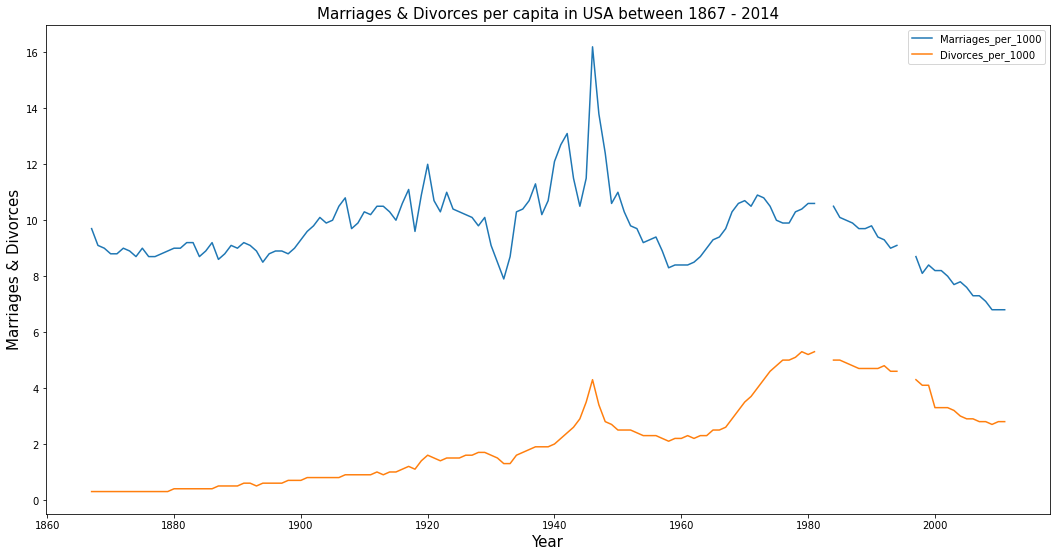

In [143]:
#Creating the Line Plot
US_df.plot.line(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], figsize=(18,9)) 
plt.xlabel('Year', fontsize = 15) 
plt.ylabel('Marriages & Divorces', fontsize = 15) 
plt.title("Marriages & Divorces per capita in USA between 1867 - 2014", fontsize=15) 
plt.legend()
plt.show()

# QUESTION 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

In [102]:
US_df = US_df[(US_df.Year == 1900) | (US_df.Year == 1950) | (US_df.Year == 2000)]

In [103]:
US_df = US_df.drop(columns = ['Marriages', 'Divorces', 'Population'])

In [104]:
US_df = US_df.set_index('Year')

In [105]:
US_df

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


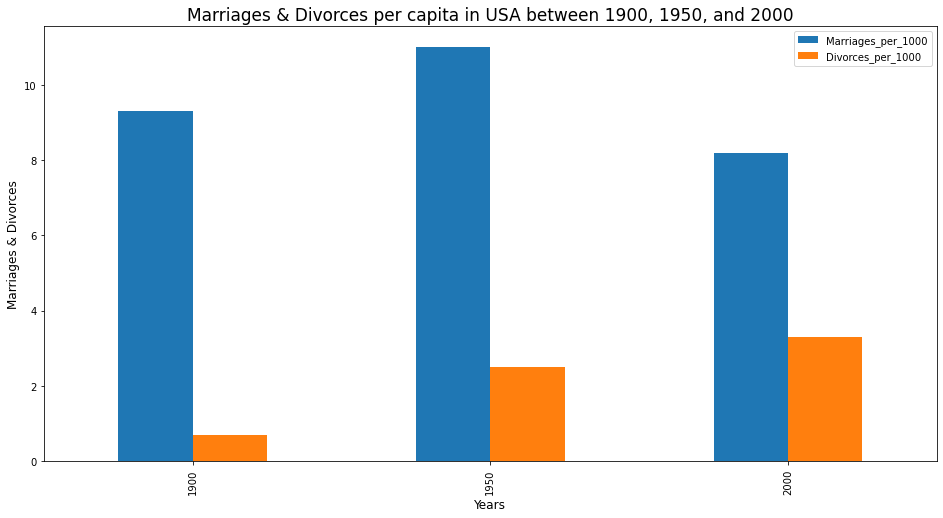

In [108]:
US_df.plot.bar(figsize=(16,8)) 
plt.xlabel('Years', fontsize = 12) 
plt.ylabel('Marriages & Divorces', fontsize = 12) 
plt.title("Marriages & Divorces per capita in USA between 1900, 1950, and 2000", fontsize=17) 
plt.legend() 
plt.show() 

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.¶

In [111]:
# Reading the data

actors = pd.read_csv('C:\\Users\\actor_kill_counts.csv')

#Sorting
actors_df = actors.sort_values(by="Count")

In [112]:
actors_df

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


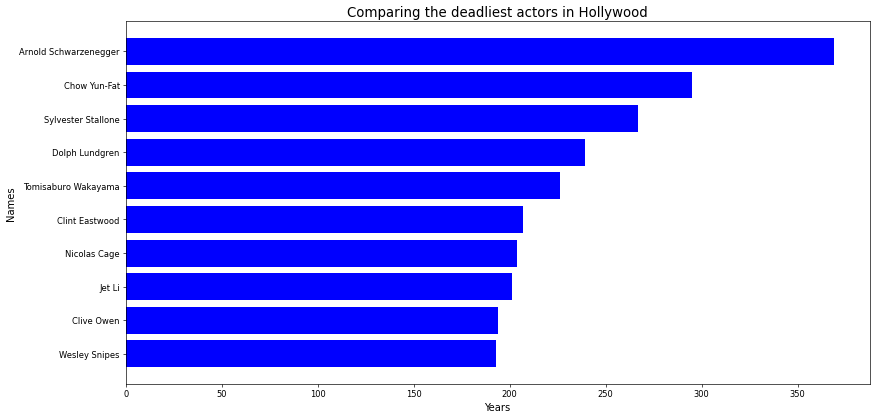

In [113]:
#Horizontal bar chart

plt.figure(figsize=(16,8), dpi= 60) 
plt.barh(actors_df['Actor'], actors_df['Count'],  color='blue')
plt.xlabel('Years', fontsize = 12) 
plt.ylabel('Names', fontsize = 12) 
plt.title("Comparing the deadliest actors in Hollywood", fontsize=16) 
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [117]:
RomanEmperor = pd.read_csv('C:\\Users\\roman-emperor-reigns.csv')

In [120]:
assassinated_df = RomanEmperor[RomanEmperor.Cause_of_Death == 'Assassinated']

In [119]:
#Calling Dataset
assassinated_df

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


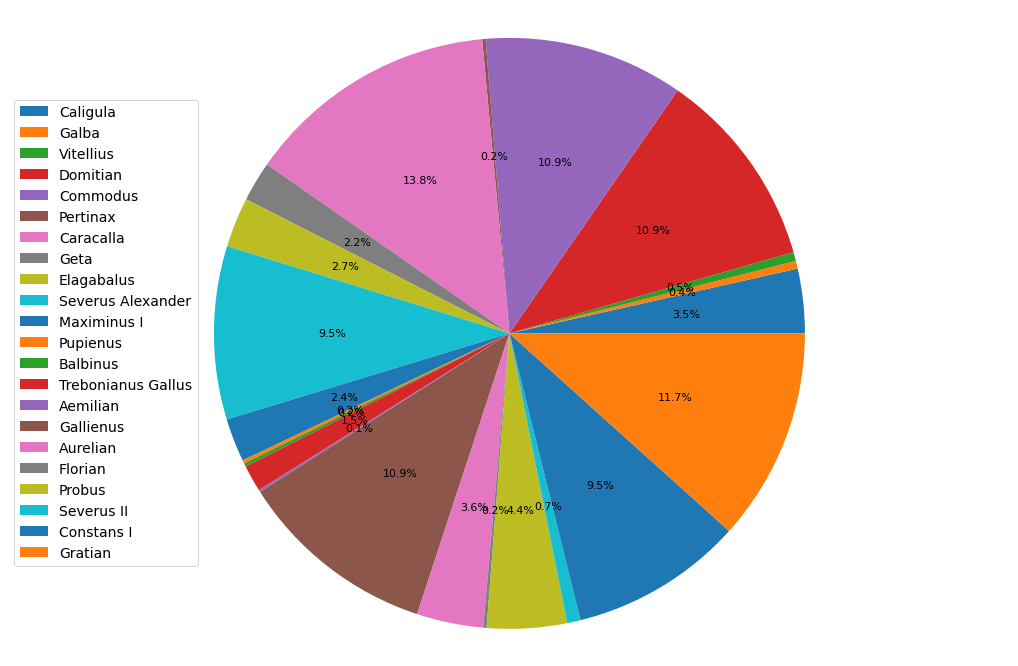

In [125]:
#Pie Chart
labels = assassinated_df.Emperor 
sizes = assassinated_df.Length_of_Reign
fig, ax = plt.subplots(figsize=(18, 12))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 11})
plt.axis('equal')
plt.legend( labels, loc='center left', fontsize = 14)
plt.show()


# Question: 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [127]:
#Reading the data
df = pd.read_csv('C:\\Users\\arcade-revenue-vs-cs-doctorates.csv')
df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [130]:
import plotly.express as pltex
plt = pltex.scatter(df, x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", title= "The Relationship between total revenue earned & number of Computer Science PhDs awarded in U.S. between 2000 and 2009",color="Year")
plt.show()